In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from sklearn.preprocessing import LabelEncoder

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [5]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [6]:
print("Destination_Type:", list(train['Destination_Type'].unique()))
print("Confidence_Life_Style_Index:", list(train['Confidence_Life_Style_Index'].unique()))

Destination_Type: ['A', 'E', 'B', 'C', 'G', 'D', 'F', 'K', 'L', 'H', 'I', 'J', 'M', 'N']
Confidence_Life_Style_Index: ['A', 'B', nan, 'C']


In [7]:
test.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
dtype: object

In [8]:
null_dict_train = {}
for col in train.columns:
    null_dict_train[col] = train[col].isnull().sum()

null_dict_test = {}
for col in test.columns:
    null_dict_test[col] = test[col].isnull().sum()

In [9]:
print('Train:\n', len(train))
print('\n'.join([key + " : " + str(value) for key, value in null_dict_train.items() if value > 0]))

Train:
 131662
Type_of_Cab : 20210
Customer_Since_Months : 5920
Life_Style_Index : 20193
Confidence_Life_Style_Index : 20193
Var1 : 71030


In [10]:
print('Test:\n', len(test))
print('\n'.join([key + " : " + str(value) for key, value in null_dict_test.items() if value > 0]))

Test:
 87395
Type_of_Cab : 13158
Customer_Since_Months : 3966
Life_Style_Index : 13327
Confidence_Life_Style_Index : 13327
Var1 : 46789


In [11]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [18]:
train.groupby('Surge_Pricing_Type').count()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
Surge_Pricing_Type,,,,,,,,,,,,,
1,27214,27214,23009,26067,23038,23038,27214,27214,27214,9299,27214,27214,27214
2,56728,56728,48083,54188,48091,48091,56728,56728,56728,26988,56728,56728,56728
3,47720,47720,40360,45487,40340,40340,47720,47720,47720,24345,47720,47720,47720


Encoding the categorical data to understand the data correlation with the target variable 'Surge_Pricing_Type'

In [21]:
train_encoded = train.copy(deep = True)
encoder = LabelEncoder()
train_encoded.Type_of_Cab=encoder.fit_transform(train.Type_of_Cab)
train_encoded.Confidence_Life_Style_Index=encoder.fit_transform(train.Confidence_Life_Style_Index)
train_encoded.Destination_Type=encoder.fit_transform(train.Destination_Type)
train_encoded.Gender=encoder.fit_transform(train.Gender)

In [15]:
train_encoded.describe()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
count,131662.000000,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,2.217337,6.016661,2.802064,1.312968,1.000144,2.849458,0.782838,64.202698,51.202800,75.099019,0.713190,2.155747
std,25.522882,1.650375,3.626887,0.225796,1.027455,1.906857,0.980675,1.037559,21.820447,4.986142,11.578278,0.452274,0.738164
min,0.310000,0.000000,0.000000,1.596380,0.000000,0.000000,0.001250,0.000000,30.000000,40.000000,52.000000,0.000000,1.000000
25%,24.580000,1.000000,3.000000,2.654730,0.000000,0.000000,2.152500,0.000000,46.000000,48.000000,67.000000,0.000000,2.000000
50%,38.200000,2.000000,6.000000,2.798050,1.000000,0.000000,2.895000,0.000000,61.000000,50.000000,74.000000,1.000000,2.000000
75%,60.730000,3.000000,10.000000,2.946780,2.000000,1.000000,3.582500,1.000000,80.000000,54.000000,82.000000,1.000000,3.000000
max,109.230000,5.000000,10.000000,4.875110,3.000000,13.000000,5.000000,8.000000,210.000000,124.000000,206.000000,1.000000,3.000000


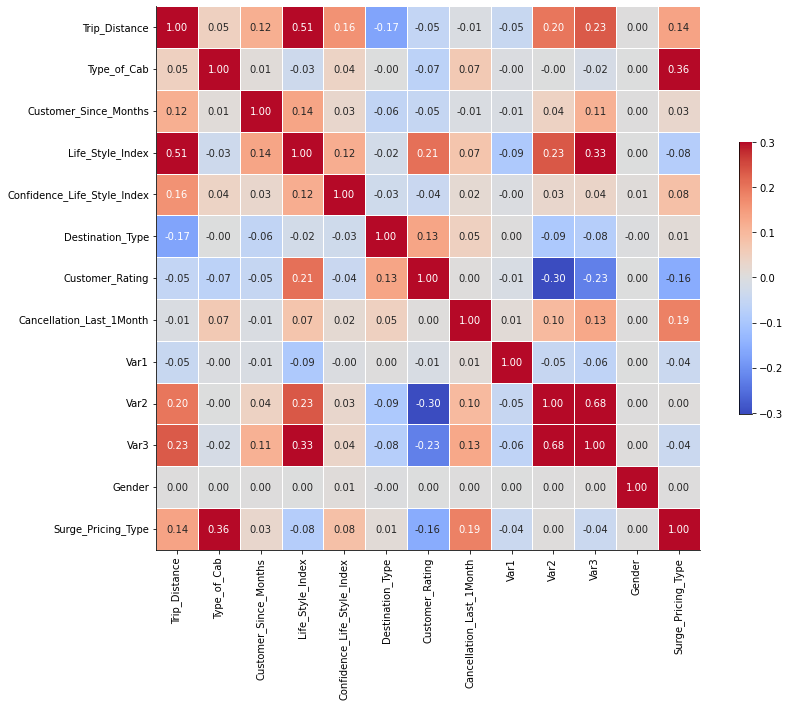

In [16]:
corr = train_encoded.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

In [22]:
df_num_corr = train_encoded.corr()['Surge_Pricing_Type'][:-1]
features_list = df_num_corr.sort_values(ascending=False)
features_list

Type_of_Cab                    0.359014
Cancellation_Last_1Month       0.185646
Trip_Distance                  0.135928
Confidence_Life_Style_Index    0.083684
Customer_Since_Months          0.027827
Destination_Type               0.012152
Var2                           0.003437
Gender                         0.000872
Var3                          -0.039309
Var1                          -0.040735
Life_Style_Index              -0.080108
Customer_Rating               -0.155279
Name: Surge_Pricing_Type, dtype: float64

It is observed from the results that no column has a high correlation with **Surge_Pricing_Type**, although among the columns **Type_of_Cab** has 0.35 coorelation coeffient which is the highest followed by the **Cancellation_Last_1Month** with 0.18.

##Understanding Numerical Data

In [23]:
train_numerical = list(train.select_dtypes(include = ['float64', 'int64']))
train_num = train[train_numerical]
train_num.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2
2,41.58,10.0,NaN,3.50125,2,NaN,56,77,2
3,61.56,10.0,NaN,3.45375,0,NaN,52,74,3
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2


/var/folders/66/b1gwcfsd2rvc8n_43gl9h3580000gn/T/ipykernel_43710/589562363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/var/folders/66/b1gwcfsd2rvc8n_43gl9h3580000gn/T/ipykernel_43710/589562363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/var/folders/66/b1gwcfsd2rvc8n_43gl9h3580000gn/T/ipykernel_43710/589562363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/var/folders/66/b1gwcfsd2rvc8n_43gl9h3580000gn/T/ipykernel_43710/589562363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/var/folders/66/b1gwcfsd2rvc8n_43gl9h3580000gn/T/ipykernel_43710/589562363.py:5: UserWarning: FixedFormatter sho

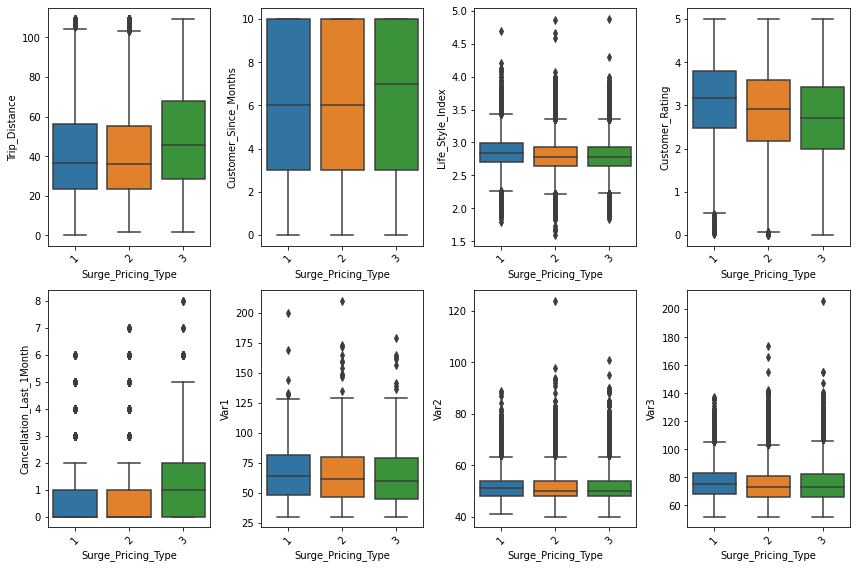

In [29]:
fig, axes = plt.subplots(round(len(train_numerical) / 4), 4, figsize=(12, 8))

for i, ax in enumerate(fig.axes):
    if i < len(train_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(x='Surge_Pricing_Type', y=train_num.columns[i], data=train_num, ax=ax)
fig.tight_layout()


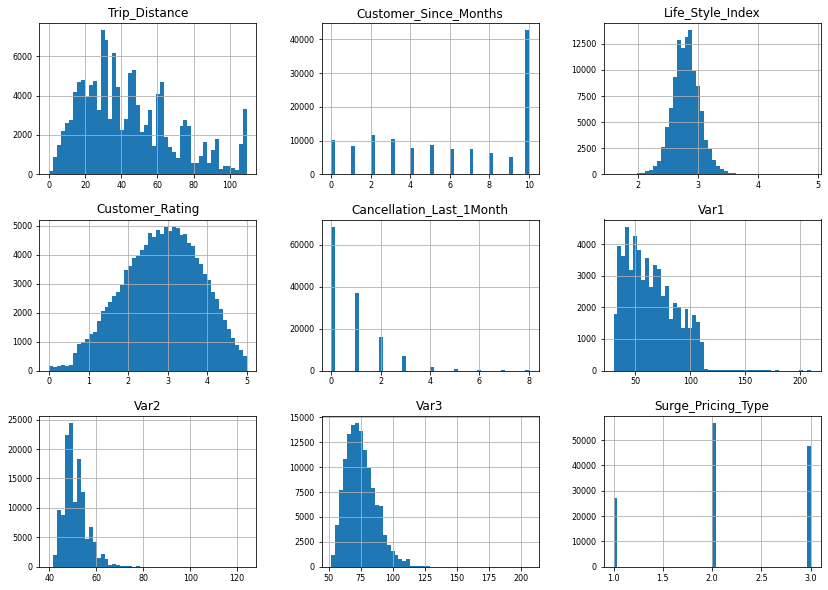

In [30]:
train_num.hist(figsize=(14, 10), bins=50, xlabelsize=8, ylabelsize=8);

Insights :
* There are number of Null values observed which needs to be handled.
* There are visible outliers for columns **Life_Style_Index**, **Var1**, **Var2**, **Var3** that needs to be handled.  
*  The **Type_Of_Cab, Life_Style_Index and Confidence_Life_Style_Index** has over 15% of unknown values and the maximum amount of unknowns are seen in **Var1** which is significantly higher (more than 50%)..In that case is it a good Idea to consider this column? or needs to be handled and checked.
*  There is no much similarities observed between the plots but **Var1,2,3** seems to have a similar pattern




##Understanding Categorical Data

In [31]:
train_categorical = list(train.select_dtypes(include=['object']))
train_categorical.append('Surge_Pricing_Type')
train_categorical.remove('Trip_ID')
train_categ = train[train_categorical]
train_categ.head()

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender,Surge_Pricing_Type
0,B,A,A,Female,2
1,B,B,A,Male,2
2,NaN,NaN,E,Male,2
3,C,NaN,A,Male,3
4,C,B,A,Male,2


/var/folders/66/b1gwcfsd2rvc8n_43gl9h3580000gn/T/ipykernel_43710/2245977806.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/var/folders/66/b1gwcfsd2rvc8n_43gl9h3580000gn/T/ipykernel_43710/2245977806.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/var/folders/66/b1gwcfsd2rvc8n_43gl9h3580000gn/T/ipykernel_43710/2245977806.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/var/folders/66/b1gwcfsd2rvc8n_43gl9h3580000gn/T/ipykernel_43710/2245977806.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/var/folders/66/b1gwcfsd2rvc8n_43gl9h3580000gn/T/ipykernel_43710/2245977806.py:5: UserWarning: FixedFormatte

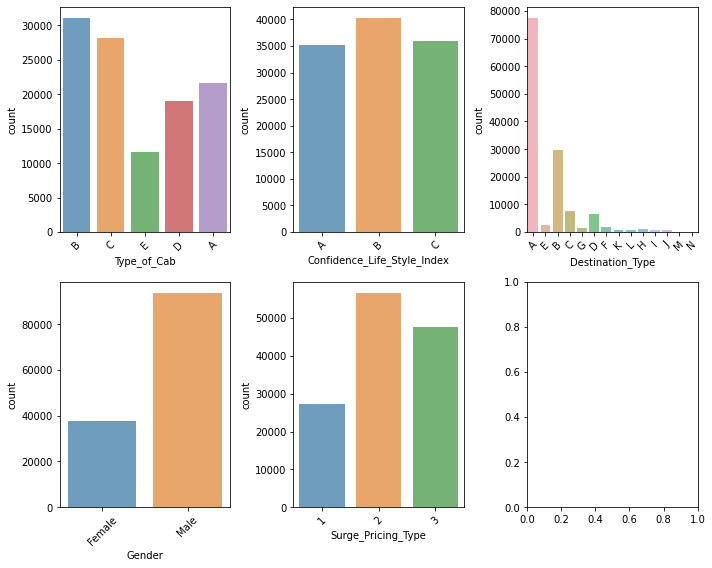

In [32]:
fig, axes = plt.subplots(round(len(train_categ.columns) / 3), 3, figsize=(10, 8))

for i, ax in enumerate(fig.axes):
    if i < len(train_categ.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=train_categ.columns[i], alpha=0.7, data=train_categ, ax=ax)

fig.tight_layout()

Insights:

*   There a number of null values for Type_of_Cab and Confidence_Life_Style_Index which needs to be handled either replacing them with a new label or with the mode value.
*   There a high number of Male customers which is more that double compared with Female strength.



##Understanding the Target Variable

Surge_Price_Type
 Based on the description/data we just know that there are three categories 1,2,3 based on which the surge price is categorized using the other features, here let's try to understand and gain more knowledge using the features.

There are 12 features defined, since the Type_of_Cab is having a high correlation let's try to start using this column to understand which is the lowest and highest category for the Surge_pricing_Type'.

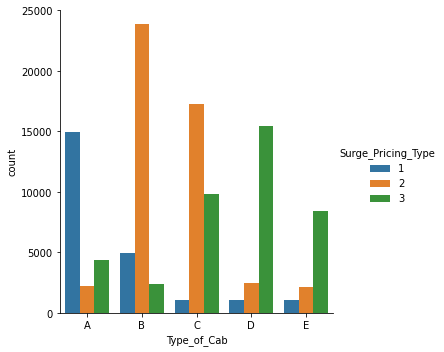

In [33]:
sns.catplot(x="Type_of_Cab", hue="Surge_Pricing_Type", kind="count", data=train, order = sorted([val for val in list(train['Type_of_Cab'].unique()) if str(val) != 'nan' ]))

Customers with Cab A are mostly categorized for Surge_Pricing_Type 1 and similary B, C Cabs for 3 and D, E for 3.
Let's assume that the Cab A is a basic cab and E be the preimum cab type. In such case, Surge_Pricing_Type 1 will be the most affordable Pricing Type and 3 will be the premimum Pricing Type.

Let's analyze with other features

<AxesSubplot:xlabel='Type_of_Cab', ylabel='Customer_Rating'>

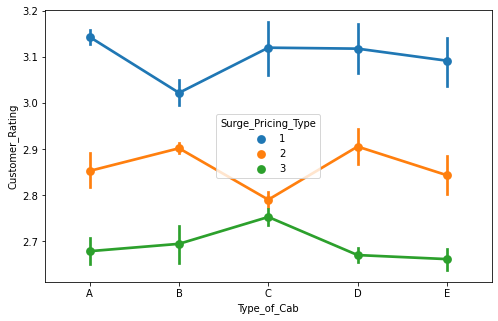

In [34]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Type_of_Cab',y='Customer_Rating',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Type_of_Cab'].unique()) if str(val) != 'nan']))

<AxesSubplot:xlabel='Type_of_Cab', ylabel='Var1'>

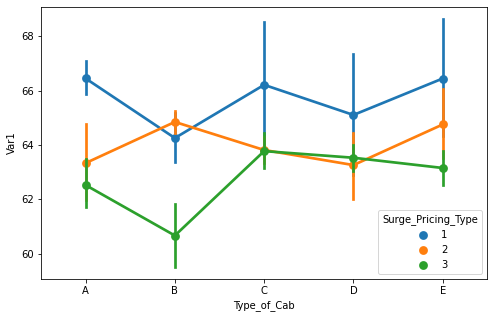

In [38]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Type_of_Cab',y='Var1',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Type_of_Cab'].unique()) if str(val) != 'nan']))

<AxesSubplot:xlabel='Type_of_Cab', ylabel='Var2'>

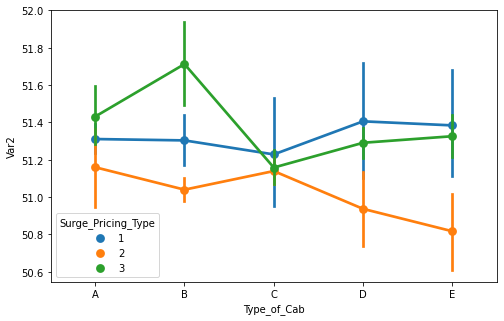

In [39]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Type_of_Cab',y='Var2',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Type_of_Cab'].unique()) if str(val) != 'nan']))

<AxesSubplot:xlabel='Type_of_Cab', ylabel='Var3'>

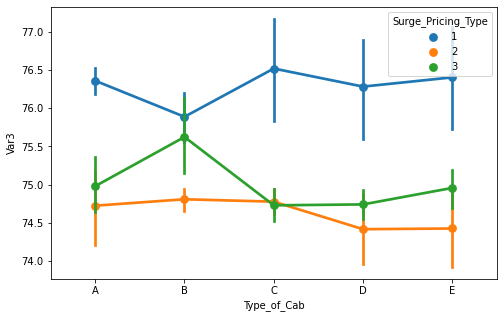

In [40]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Type_of_Cab',y='Var3',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Type_of_Cab'].unique()) if str(val) != 'nan']))

<AxesSubplot:xlabel='Destination_Type', ylabel='Customer_Rating'>

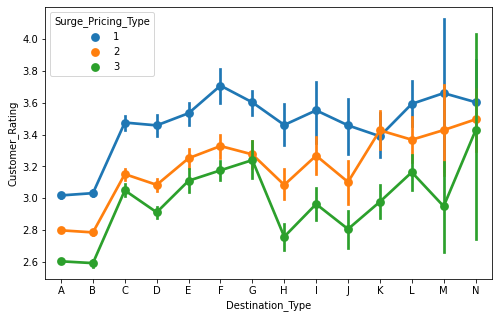

In [35]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Destination_Type',y='Customer_Rating',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Destination_Type'].unique()) if str(val) != 'nan']))

<AxesSubplot:xlabel='Destination_Type', ylabel='Trip_Distance'>

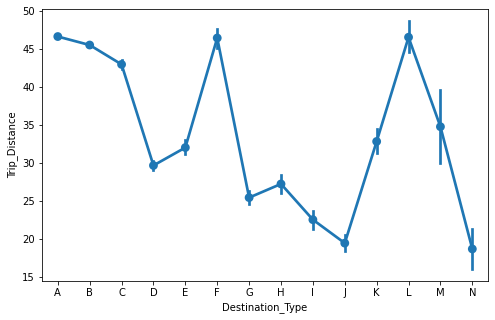

In [36]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Destination_Type',y='Trip_Distance',data=train, order = sorted([val for val in list(train['Destination_Type'].unique()) if str(val) != 'nan']))

<AxesSubplot:xlabel='Type_of_Cab', ylabel='Life_Style_Index'>

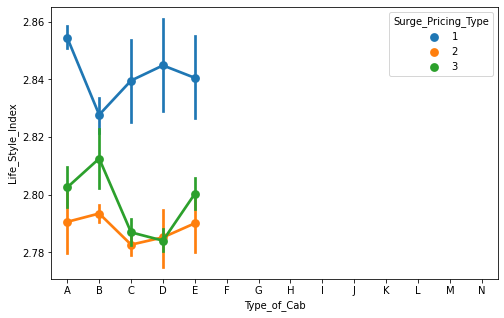

In [37]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Type_of_Cab',y='Life_Style_Index',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Destination_Type'].unique()) if str(val) != 'nan']))

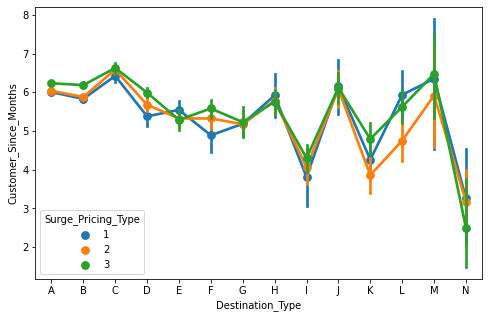

In [57]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Destination_Type',y='Customer_Since_Months',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Destination_Type'].unique()) if str(val) != 'nan']))

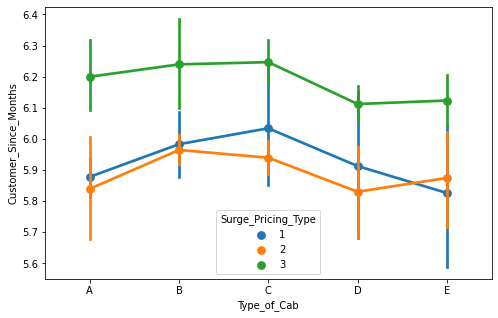

In [123]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Type_of_Cab',y='Customer_Since_Months',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Type_of_Cab'].unique()) if str(val) != 'nan']))

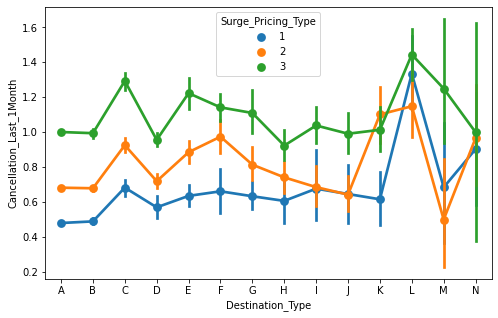

In [58]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Destination_Type',y='Cancellation_Last_1Month',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Destination_Type'].unique()) if str(val) != 'nan']))

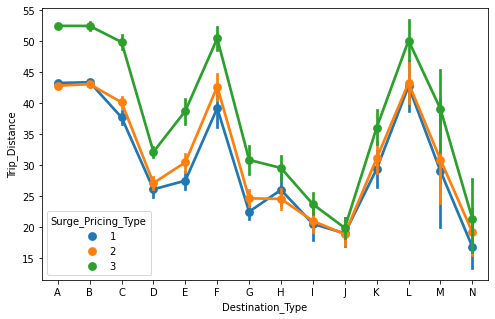

In [59]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Destination_Type',y='Trip_Distance',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Destination_Type'].unique()) if str(val) != 'nan']))

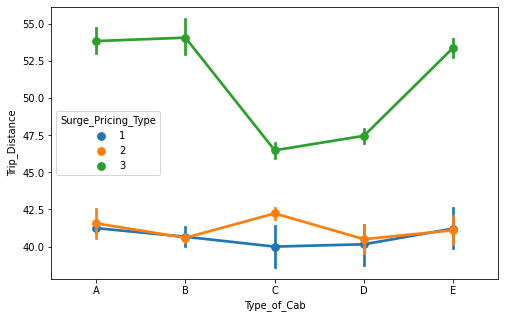

In [60]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Type_of_Cab',y='Trip_Distance',data=train, hue='Surge_Pricing_Type', order = sorted([val for val in list(train['Type_of_Cab'].unique()) if str(val) != 'nan']))

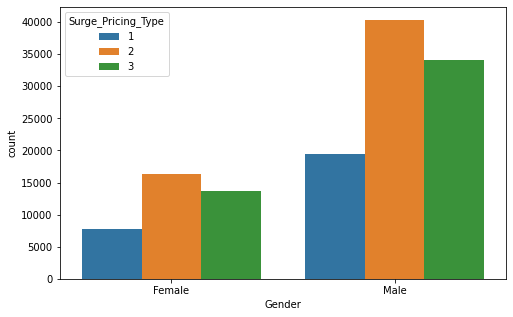

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',data=train, hue='Surge_Pricing_Type')

Insights:
* Customers with high Customer rating are mostly considered 
under Surge_Pricing_Type 1, which means good customers are given good affordable price.
* Customers in data are customers who have joined 0-10 months, customers who are new that is upto 6 months(approx) are mostly likely to be considered under 1 or 2  Surge_Pricing_Type that means new customers are given affordable prices till 6 months.
* Long distance travels are expensive.
* Customer with more number of Cancellations will be considered under Type 3.
* Though there are a lot of missing values in Var1, there seems to be a correlation with target variable, higher Var1 and Var3 values, lower seems to be the Surge_Price_Type, although the pattern is not constant in type 2 and 3. 
* Var2, Destination looks bit complicated and does'nt have a specific pattern to infer from, but let's try multiple methods to understand while training and may be doing a feature selection.

Other features will affect the trend, but we are here just trying to generalize the scenarios.

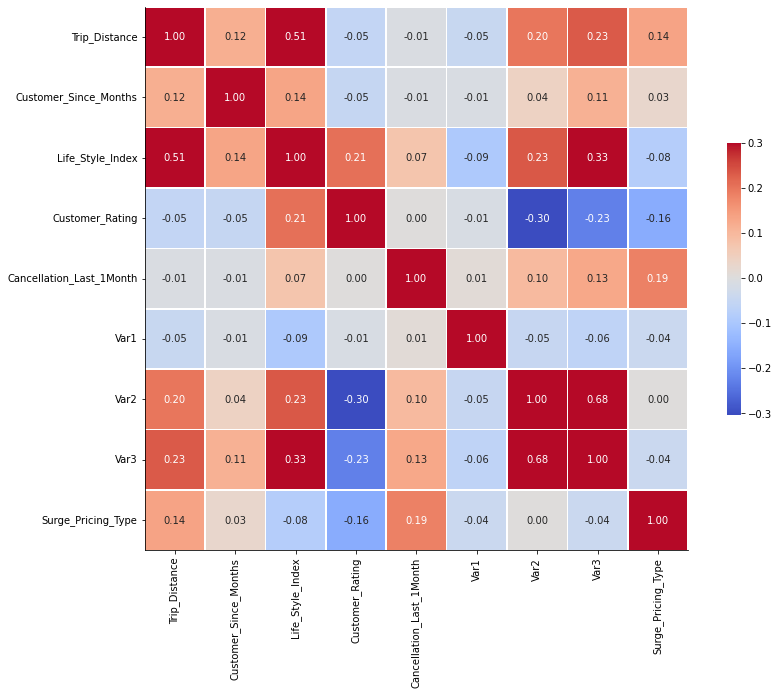

In [27]:
corr = train.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

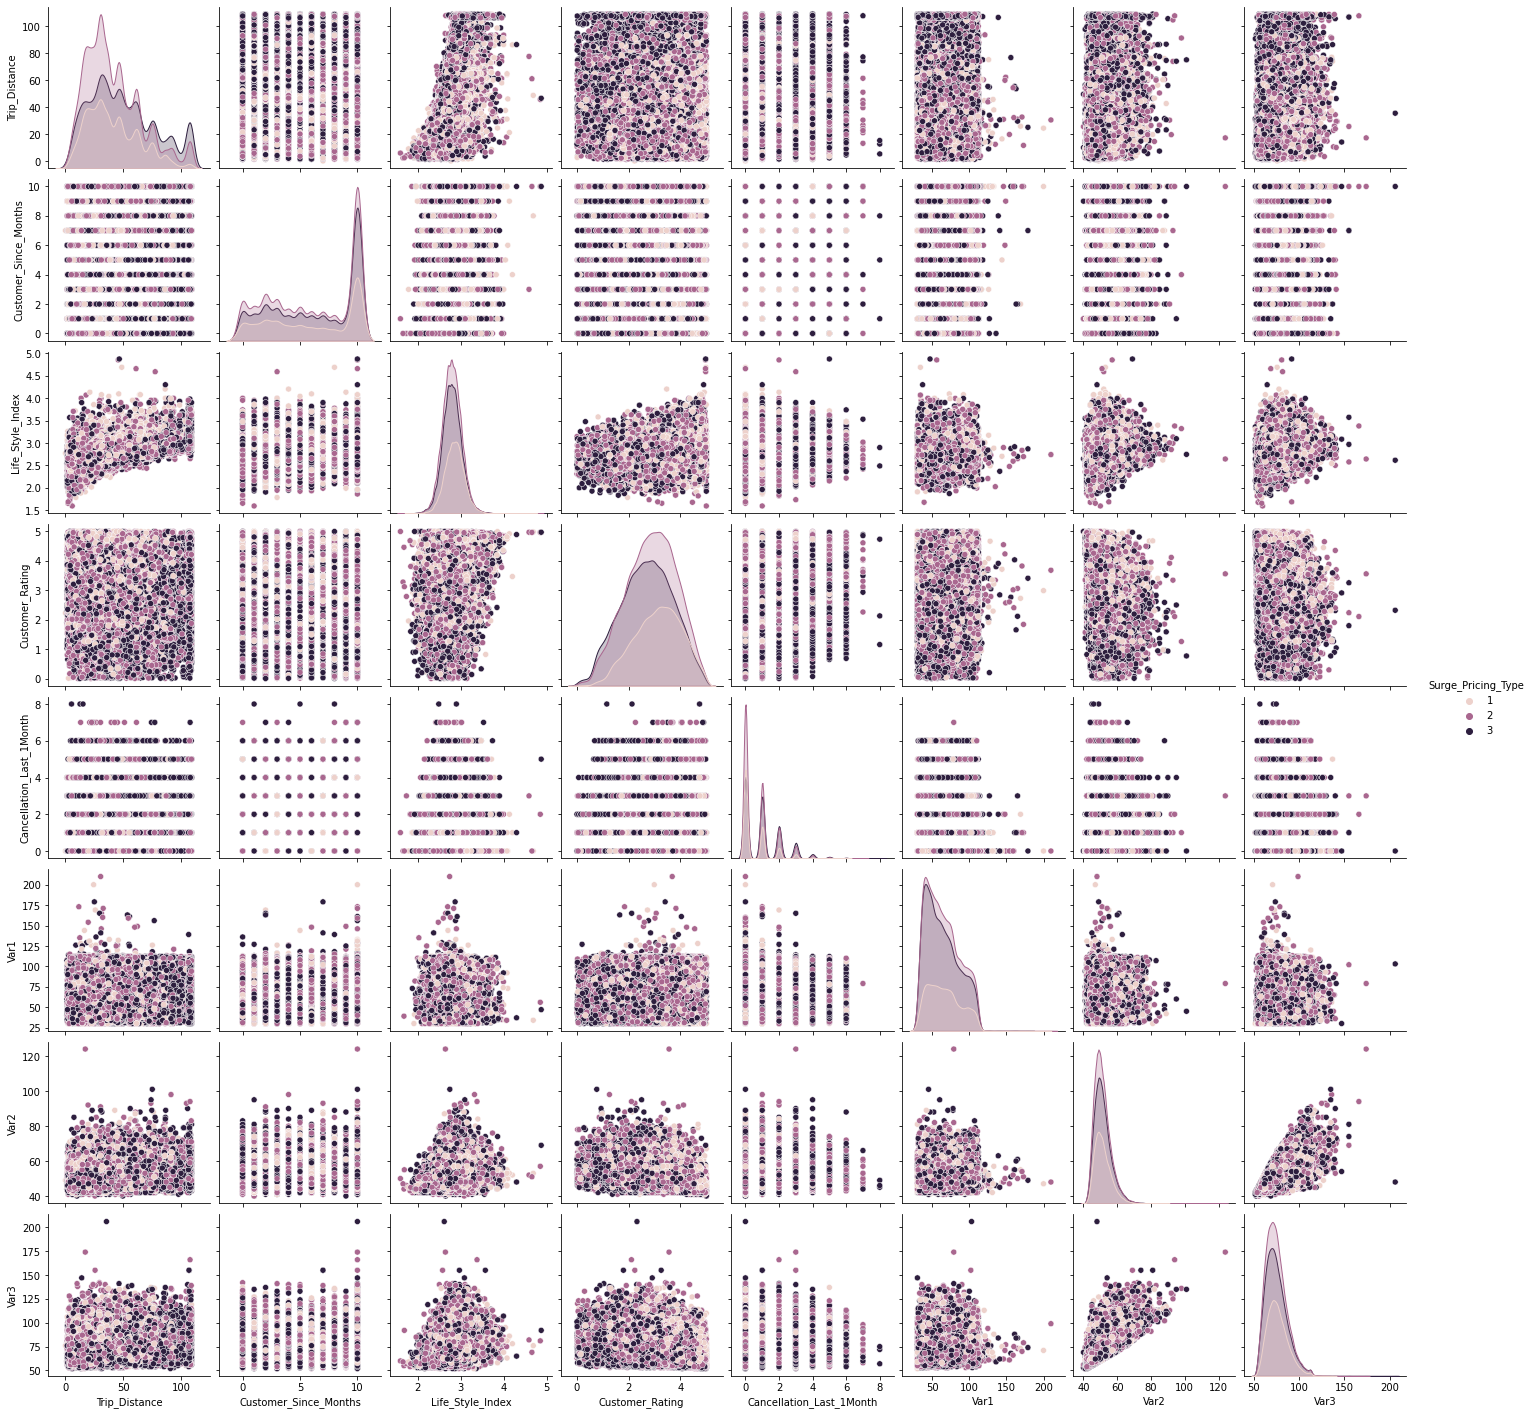

In [ ]:
g = sns.pairplot(train, hue = 'Surge_Pricing_Type')